In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal

In [2]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
dado_sensor = 'dados_extraidos_rolamento_interno_radial1.csv'
ordem = 1

df = pd.read_csv(f'{models.path_dados_tratados}/ordens_{ordem}/{dados_extraidos_geral}', header=0)
df = pd.DataFrame(df)[models.colunas]
df['defeito'] = df['defeito'].replace(models.sensores)

df['rotacao_hz'] = 10*(df['rotacao_hz']//10)
print(df['rotacao_hz'])

# df['sensor'] = df['sensor'].replace(models.sensores)

df = normalizar_sinal.NormalizarSinal(df,1).Get()
df = pd.DataFrame(df)[models.colunas]
print(df)
# print(df)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
# print(X_train)

0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
165355    50.0
165356    50.0
165357    50.0
165358    50.0
165359    50.0
Name: rotacao_hz, Length: 165360, dtype: float64
        rotacao_hz    maximo       rms  assimetria   curtose  fator_crista  \
0         0.076923  0.009545  0.021910    0.127253  0.044261      0.054624   
1         0.076923  0.009545  0.021947    0.127700  0.044343      0.054511   
2         0.076923  0.009545  0.021913    0.128246  0.044655      0.054615   
3         0.076923  0.009545  0.021898    0.127376  0.044411      0.054661   
4         0.076923  0.009545  0.021906    0.127553  0.044426      0.054637   
...            ...       ...       ...         ...       ...           ...   
165355    0.384615  0.120000  0.169677    0.019870  0.023770      0.096196   
165356    0.384615  0.120000  0.169710    0.020616  0.024080      0.096174   
165357    0.384615  0.120000  0.169415    0.022675  0.024260      0.096370   
165358

In [3]:
 
# Treina o classificador
clf = DecisionTreeClassifier(max_depth=10000000,random_state=1000)
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.933599419448476


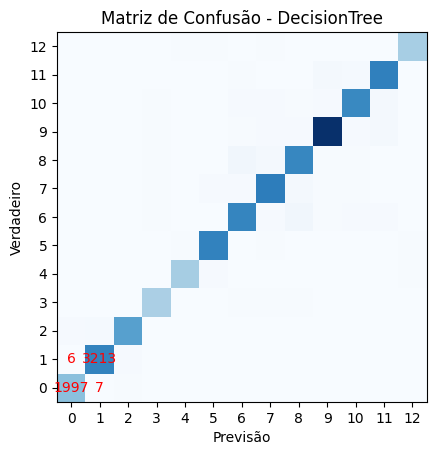

A precisão do classificador é: 93.4 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.97      0.98      0.97      2045
               ball_fault_baixo       0.98      0.98      0.98      3268
               ball_fault_medio       0.97      0.96      0.96      2764
 desalinhamento_horizontal_alto       0.89      0.90      0.90      1747
desalinhamento_horizontal_baixo       0.92      0.92      0.92      1813
desalinhamento_horizontal_médio       0.94      0.94      0.94      3426
   desalinhamento_vertical_alto       0.90      0.89      0.90      3552
  desalinhamento_vertical_baixo       0.91      0.91      0.91      3641
  desalinhamento_vertical_médio       0.88      0.89      0.88      3547
          desbalanceamento_alto       0.94      0.93      0.93      5105
         desbalanceamento_baixo       0.92      0.91      0.92      3444
         desbalanceamento_medio       0.92      0.92    

In [4]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
metodo = 'KNeighbors'
knn.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", np.round(100*accuracy,2),'%')


Acurácia: 95.93 %


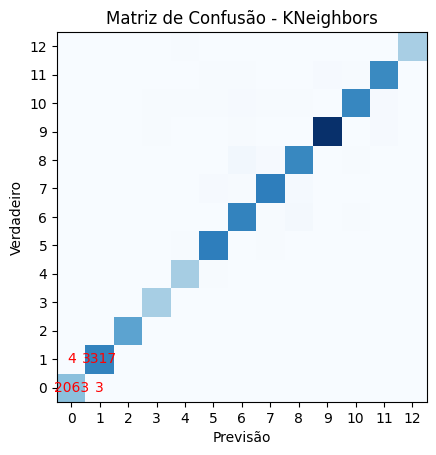

A precisão do classificador é: 95.93 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.99      1.00      0.99      2072
               ball_fault_baixo       1.00      1.00      1.00      3326
               ball_fault_medio       1.00      1.00      1.00      2684
 desalinhamento_horizontal_alto       0.93      0.96      0.94      1771
desalinhamento_horizontal_baixo       0.92      0.95      0.94      1795
desalinhamento_horizontal_médio       0.95      0.96      0.95      3563
   desalinhamento_vertical_alto       0.91      0.93      0.92      3566
  desalinhamento_vertical_baixo       0.94      0.94      0.94      3638
  desalinhamento_vertical_médio       0.92      0.92      0.92      3555
          desbalanceamento_alto       0.97      0.97      0.97      5079
         desbalanceamento_baixo       0.95      0.92      0.94      3556
         desbalanceamento_medio       0.95      0.95   

In [6]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [7]:
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report

# Dividir o dataset em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Treinar o classificador NuSVC
clf = NuSVC()
metodo = 'NuSVC'
clf.fit(X_train, y_train)

# Realizar as previsões
y_pred = clf.predict(X_test)

# Mostrar os resultados
print(classification_report(y_test, y_pred))

In [ ]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))